# TP sur la prevision du taux d'ozone

## 1. Lecture du fichier

In [223]:
#Lecture du fichier
path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
ozone=read.table(paste(path,"depSeuil.dat",sep=""),sep=",",header=T)
# Vérification du contenu
summary(ozone)

      JOUR            O3obs           MOCAGE          TEMPE      
 Min.   :0.0000   Min.   : 19.0   Min.   : 46.4   Min.   :10.40  
 1st Qu.:0.0000   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20  
 Median :0.0000   Median :109.0   Median :125.6   Median :23.80  
 Mean   :0.3045   Mean   :115.4   Mean   :127.2   Mean   :23.88  
 3rd Qu.:1.0000   3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60  
 Max.   :1.0000   Max.   :319.0   Max.   :284.7   Max.   :38.00  
     RMH2O              NO2               NO           STATION         
 Min.   :0.00285   Min.   : 0.258   Min.   :0.0010   Length:1041       
 1st Qu.:0.00763   1st Qu.: 1.248   1st Qu.:0.2360   Class :character  
 Median :0.00985   Median : 2.109   Median :0.3880   Mode  :character  
 Mean   :0.01025   Mean   : 3.505   Mean   :0.6574                     
 3rd Qu.:0.01244   3rd Qu.: 4.062   3rd Qu.:0.7440                     
 Max.   :0.02753   Max.   :44.396   Max.   :9.4290                     
    VentMOD           VentANG     

In [224]:
# Changement du type de la variable jour en facteur
ozone[,"JOUR"]=as.factor(ozone[,"JOUR"])
ozone[, "STATION"] <- as.factor(ozone[, "STATION"])

In [225]:
# Affichage des 10 premiers element du tableau
head(ozone,10)

,JOUR,O3obs,MOCAGE,TEMPE,RMH2O,NO2,NO,STATION,VentMOD,VentANG
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,1,91,93.2,21.5,0.00847,1.602,0.424,Aix,9.5000,-0.64350
2,1,100,104.6,20.2,0.00881,2.121,0.531,Aix,8.0100,-0.04996
3,0,82,103.6,17.4,0.00951,1.657,0.467,Aix,9.3771,-0.12832
4,0,94,94.8,18.8,0.00855,2.350,0.701,Aix,9.4578,-0.34516
5,0,107,99.0,23.7,0.00731,1.653,0.452,Aix,7.8791,-0.41822
6,0,150,114.3,23.6,0.01182,5.316,1.343,Aix,6.3127,0.06341
7,0,164,127.7,26.6,0.00937,2.841,0.550,Aix,4.8042,0.04164
8,1,135,164.3,23.5,0.01087,15.733,2.911,Aix,4.8795,0.79989
9,1,121,144.1,23.3,0.01168,8.807,1.867,Aix,5.1088,0.70226


## 2. Exploration elementaire

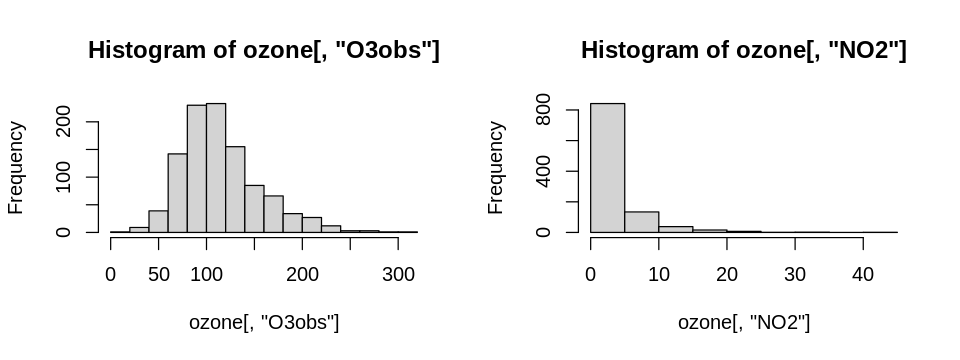

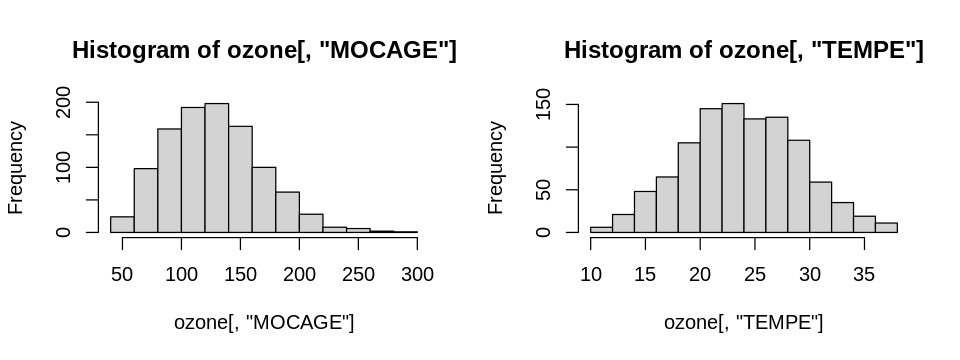

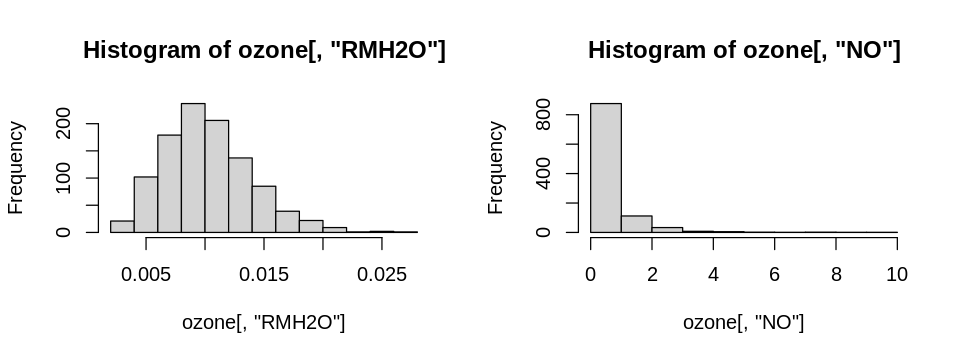

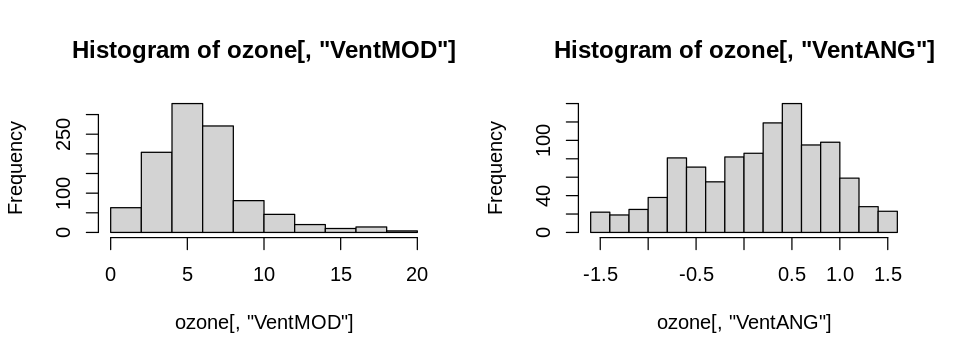

In [226]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
hist(ozone[,"O3obs"])
hist(ozone[,"NO2"])
hist(ozone[,"MOCAGE"])
hist(ozone[,"TEMPE"])
hist(ozone[,"RMH2O"])
hist(ozone[,"NO"])
hist(ozone[,"VentMOD"])
hist(ozone[,"VentANG"])

**Remarque :**
- La repartition de la concentration de O3obs, MOCAGE, RMH2O, VentMOD, VentANG, NO2 et NO sont asymetriques
- La concentration de TEMPE est symetrique

In [227]:
ozone[,"SRMH2O"]=sqrt(ozone[,"RMH2O"])
ozone[,"LNO2"]=log(ozone[,"NO2"])
ozone[,"LNO"]=log(ozone[,"NO"])

Les fonctions sqrt et log ont permis de rendre les distributions plus symmetriques

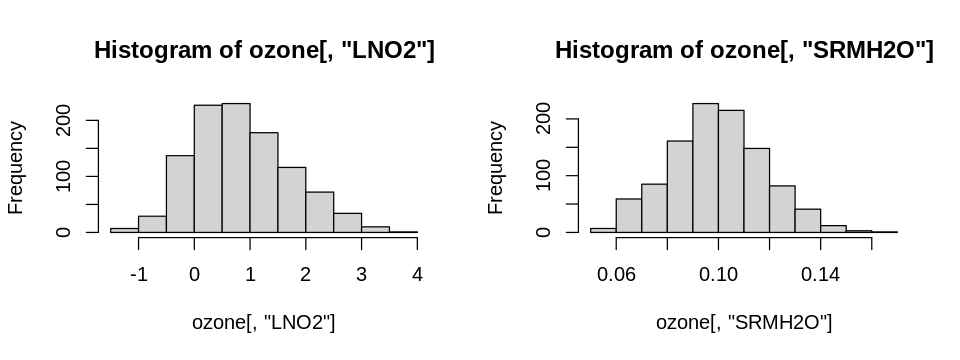

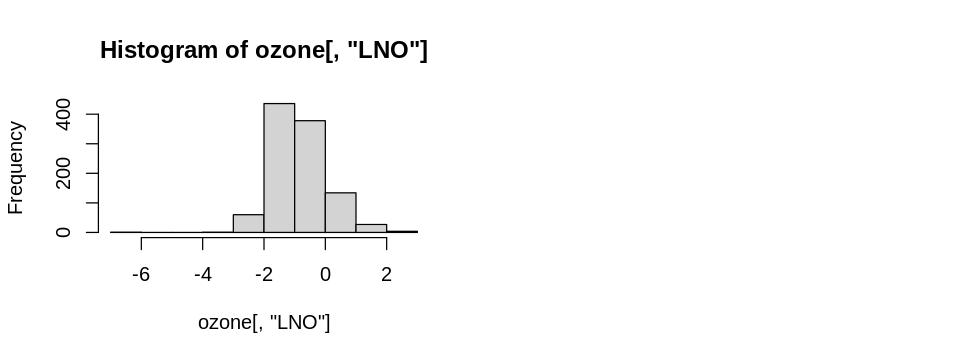

In [228]:
par(mfrow=c(1,2))
options(repr.plot.width=8, repr.plot.height=3)
hist(ozone[,"LNO2"])
hist(ozone[,"SRMH2O"])
hist(ozone[,"LNO"])

In [229]:
ozone=ozone[,c(1:4,8:13)]
ozone[,"DepSeuil"]=as.factor(ozone[,"O3obs"]>150)
summary(ozone)

 JOUR        O3obs           MOCAGE          TEMPE       STATION  
 0:724   Min.   : 19.0   Min.   : 46.4   Min.   :10.40   Aix:199  
 1:317   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20   Als:222  
         Median :109.0   Median :125.6   Median :23.80   Cad:202  
         Mean   :115.4   Mean   :127.2   Mean   :23.88   Pla:208  
         3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60   Ram:210  
         Max.   :319.0   Max.   :284.7   Max.   :38.00            
    VentMOD           VentANG            SRMH2O             LNO2        
 Min.   : 0.1414   Min.   :-1.5708   Min.   :0.05339   Min.   :-1.3548  
 1st Qu.: 3.9623   1st Qu.:-0.3948   1st Qu.:0.08735   1st Qu.: 0.2215  
 Median : 5.5973   Median : 0.2783   Median :0.09925   Median : 0.7462  
 Mean   : 5.9072   Mean   : 0.1631   Mean   :0.09957   Mean   : 0.8440  
 3rd Qu.: 7.1063   3rd Qu.: 0.6926   3rd Qu.:0.11153   3rd Qu.: 1.4017  
 Max.   :19.8910   Max.   : 1.5708   Max.   :0.16592   Max.   : 3.7931  
      LNO           

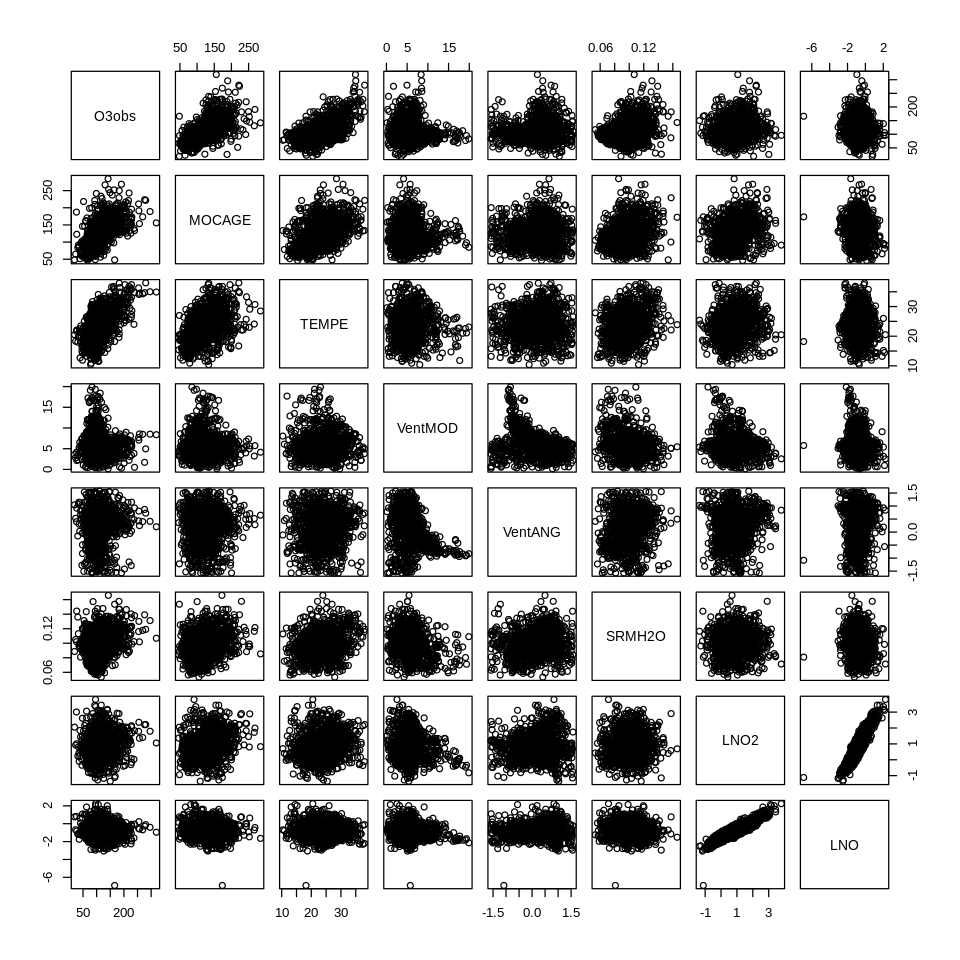

In [230]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(ozone[, c(2:4, 6:10)])   

### Q1:Interpretation:
- Les nuages de points formés par (MOCAGE et TEMPE) , (MOCAGE  et  SRMH2O) , (MOCAGE et LNO2), (TEMPE et SRMH2O), (TEMPE et LNO2) (SRMH2O et LNO2) sont ovales couvrant une grande surface ce qui révèle une faible corrélation.
- Le nuage de points formé LNO et LNO2 est situé sur une même diagonale ce qui indique une forte corrélation positive entre ces deux variables
- Tous les autres diagrammes de dispersions entre les variables restantes ont des formes non identifiable ce qui indique aucune corrélation


In [231]:
install.packages(c('GGally','ggplot2','corrplot'))
library("ggplot2")                     
library("GGally")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

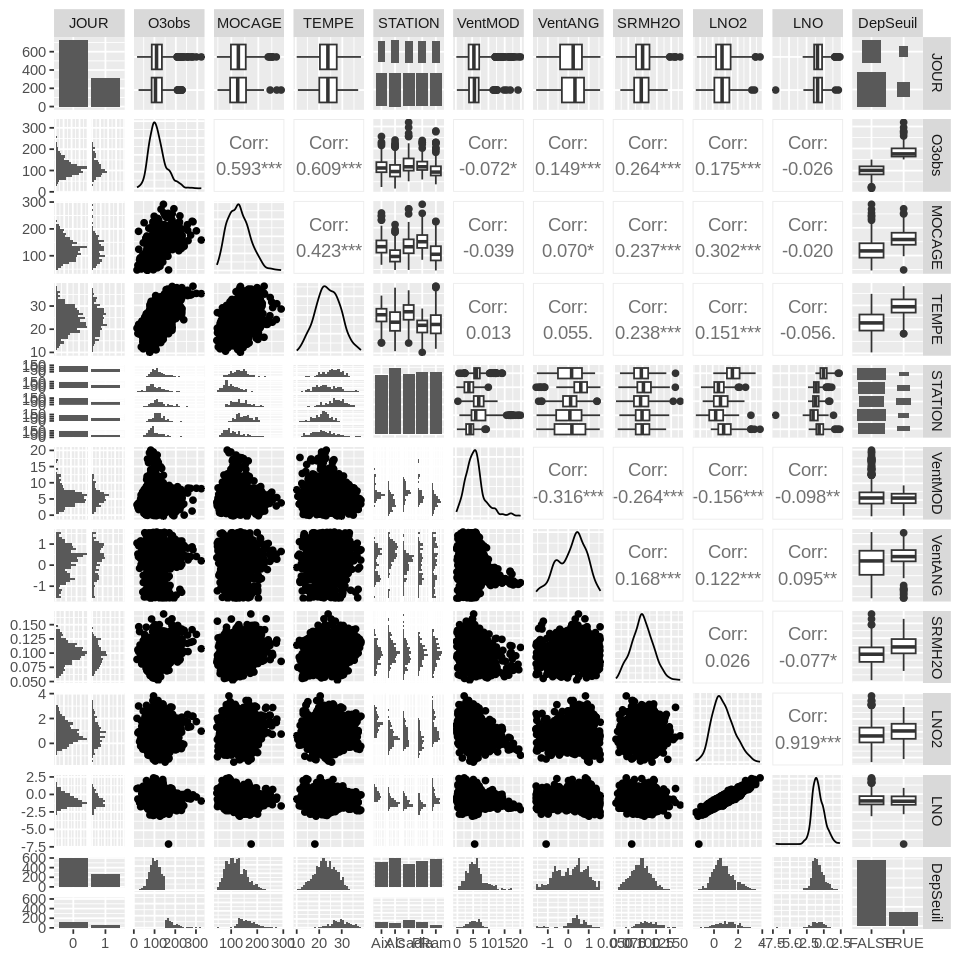

In [232]:
GGally::ggpairs(ozone) 


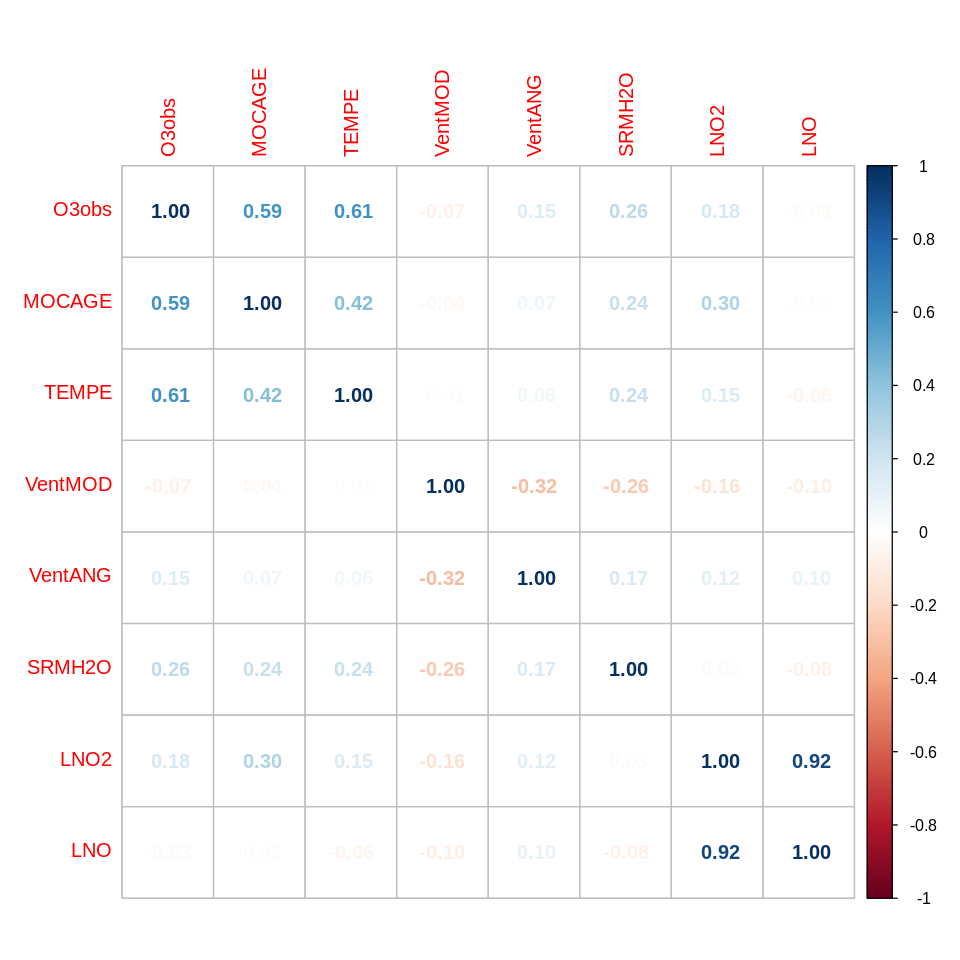

In [233]:
library('corrplot') 

matrice <- cor(ozone[, c(2:4, 6:10)])
corrplot(matrice, method = 'number') 



les variables NO2 et LNO2 ont une valeur très proche de 1 qui vaut 0.92 ce qui est fortement corréler positivement.

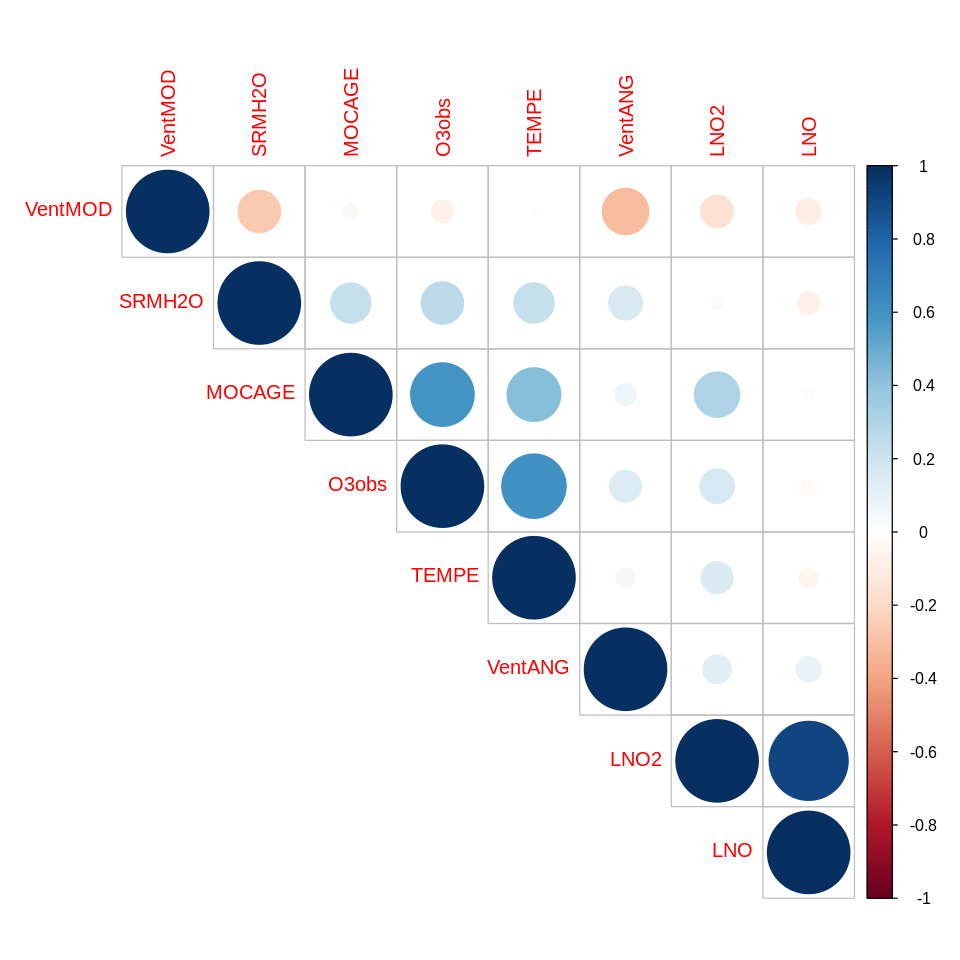

In [234]:
corrplot(matrice, type="upper", order="hclust")

### Question 2 : 
*  **Limite de ce type de diagnostic numérique :** On peut pas visualiser la correlation au dela de 2 variables (mais 
on peut les calculer)
*   **Type de corrélation est mesuré :** Type de corrélation est une corrélation linéaire



In [235]:
install.packages("FactoMineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



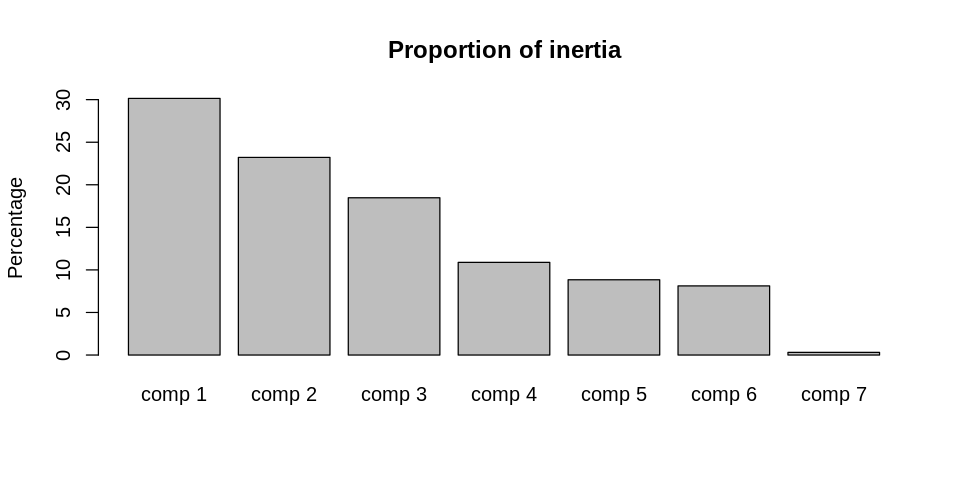

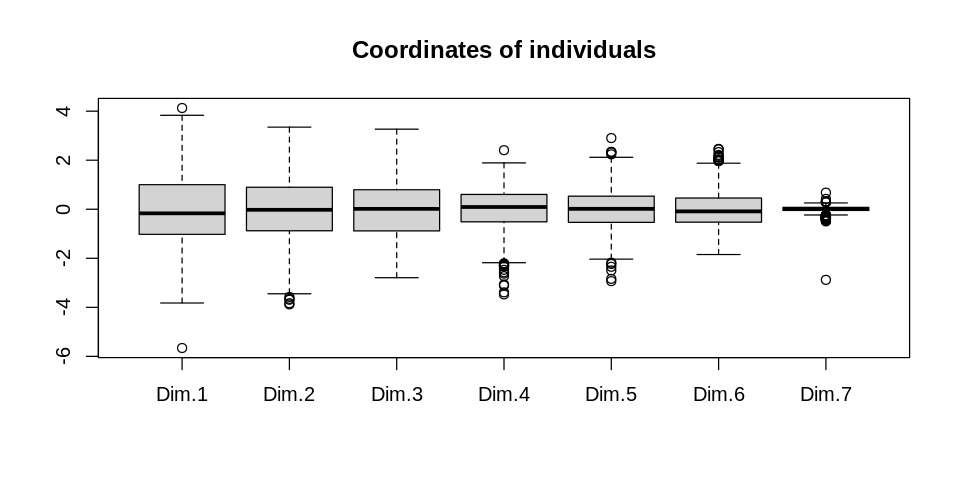

In [236]:
# ACP réduite
# Décroissance des valeurs propres

library("FactoMineR")
acp <- PCA(ozone[, c(11,2:4, 6:10)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)
options(repr.plot.width = 8, repr.plot.height = 4)
#par(mfrow = c(1, 2))
barplot(acp$eig[, 2], ylab = "Percentage", main = "Proportion of inertia")
boxplot(acp$ind$coord, main = "Coordinates of individuals")

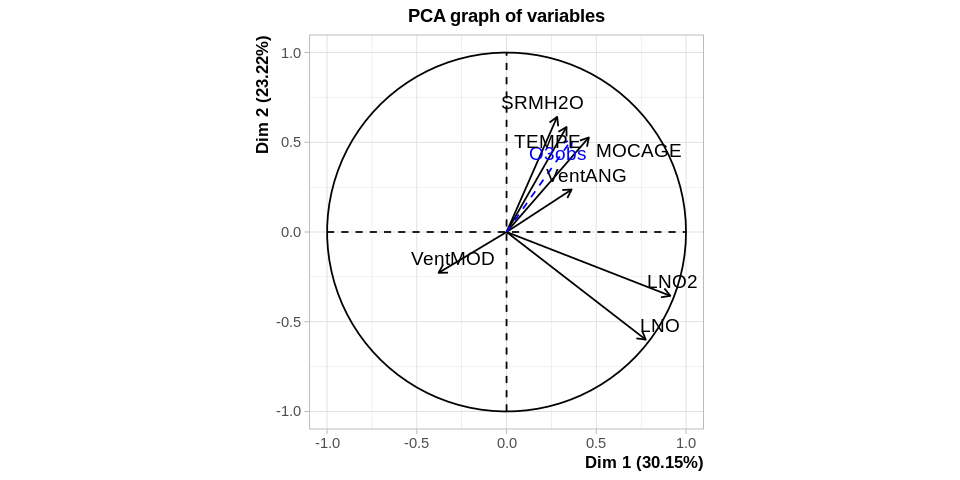

In [237]:
plot(acp, choix = "varcor")

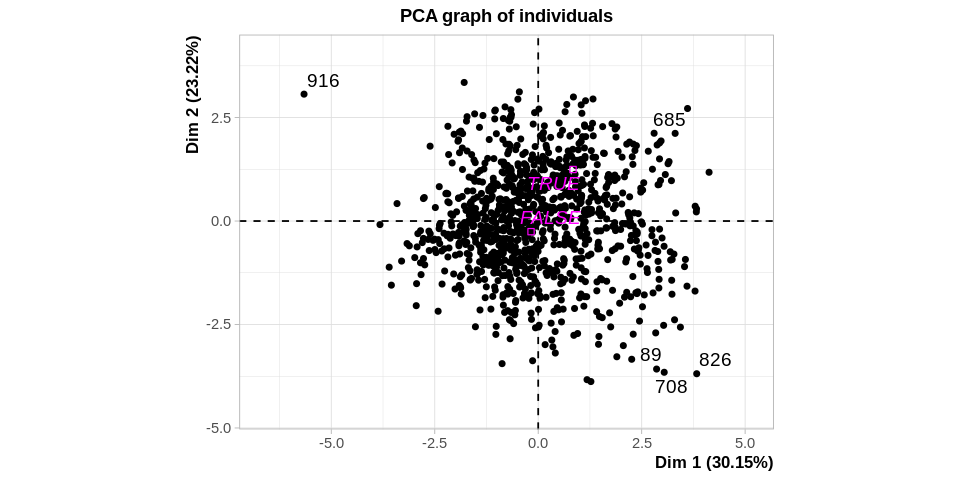

In [238]:
plot(acp, choix = "ind", select = "contrib 5", unselect = 0)

In [239]:
acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.11028586,30.1469408,30.14694
comp 2,1.62520441,23.2172058,53.36415
comp 3,1.29335091,18.4764416,71.84059
comp 4,0.76195442,10.8850632,82.72565
comp 5,0.61891654,8.8416649,91.56732
comp 6,0.56848881,8.1212687,99.68859
comp 7,0.02179904,0.3114149,100.00000


### Q: détermination des graphiques


* le premier c’est le graphe de cercle de corrélation
* le deuxième s’appelle le graphe des individus

### Q: Choix des dimensions, et des valeurs atypiques

- Le choix des dimensions est le facteur principale qui determine la qualité d'une ACP. 
-le choix n'est pas le meilleur dans notre ca car la somme des dimensions est loin de 100%, dans notre cas elle est à 53%, en peut choisir la dimension 3 pour avoir un bon résultat d'environ 72%, théoriquement on peut aller jusqu'à la 6ème dimension mais au dela de la 3ème dimension on ne peut pas les représenter.

* Pour les valeurs atypique (valeur aberrantes) on remarque que il y'a pas beaucoup de valeur qui sont loin mais un seul point atypique peut modifier considérablement la pente de la droite de régression et donc la valeur de la corrélation 

### Q: Structure de correlation des variables
* Plus les variables sont loin de l'axe plus ils sont bien représentées par l'ACP exmple LNO et LNO2
* Plus deux variables sont corrélées, plus leurs flèches pointent dans la même direction. 

Oui elle est intuitive

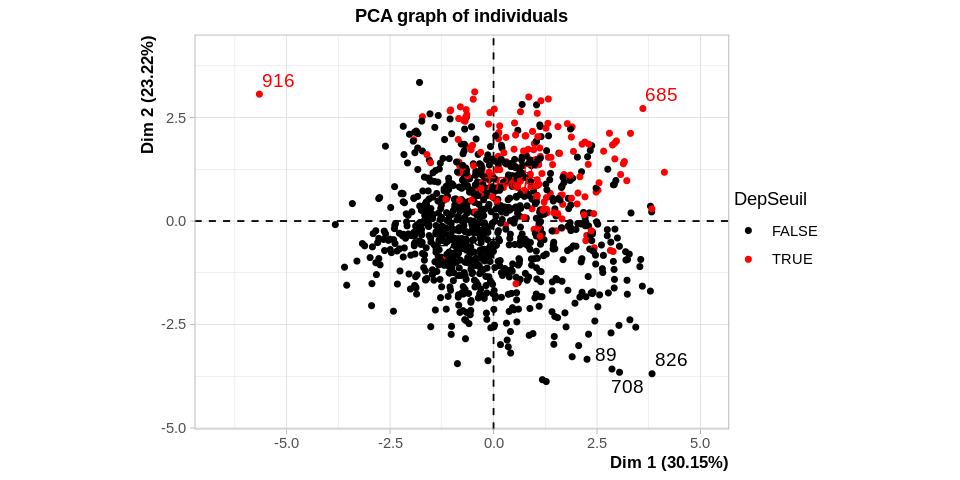

In [240]:

plot(acp, choix = "ind", habillage = 1,
     select = "contrib 5", unselect = 0)

### Q5: Une discriminaiton linéaire (hyperplan) semble-t-elle possible?
- Une discrimination ne semble pas évidente à cause de la forte correlation entre les deux composantes et on est sur 2 dimension  

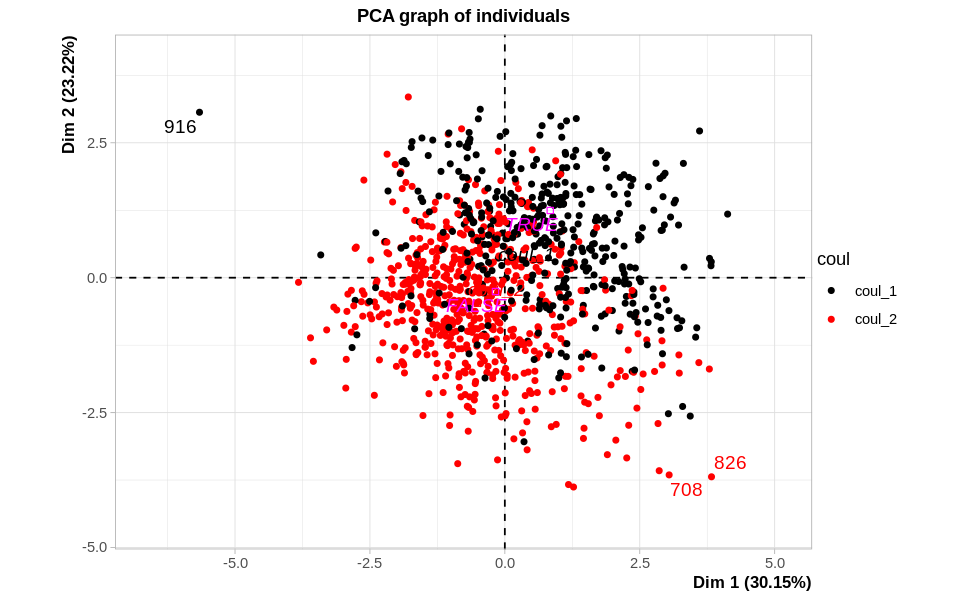

In [297]:

km.ozone <- kmeans(ozone[, c(3:4, 6:10)], centers = 2)
# Représentation dans les coordonnées de l'acp
acp2 <- PCA(cbind(coul = as.factor(km.ozone$cluster),
          ozone[, c(11, 3:4, 6:10)]), scale.unit = TRUE,
          graph = FALSE, quali.sup = 1:2, ncp = 7)
plot(acp2, choix = "ind", habillage = "coul",
     select = "contrib 3", unselect = 0)
     

* De la même manière ici la discrimination donne les memes informations avec plus de précision

# 3. Protocole de comparaison

#### Q1: Comment appele t-on cette procédure de  validation croisée?
On appele cette procédure **Train-Test Split**

## 3.1. Extraction des echantillions

In [298]:
set.seed(142) # initialisation du générateur
# Extraction des échantillons
test.ratio=.2   # part de l'échantillon test
npop=nrow(ozone) # nombre de lignes dans les données
nvar=ncol(ozone) # nombre de colonnes
# taille de l'échantillon test
ntest=ceiling(npop*test.ratio) 
# indices de l'échantillon test
testi=sample(1:npop,ntest)
# indices de l'échantillon d'apprentissage
appri=setdiff(1:npop,testi)

In [302]:
# construction de l'échantillon d'apprentissage
datappr <- ozone[appri, -11] 
# construction de l'échantillon test
datestr <- ozone[testi, -11] 
# vérification
str(datappr)
#summary(datappr)

'data.frame':	832 obs. of  10 variables:
 $ JOUR   : Factor w/ 2 levels "0","1": 2 1 1 1 2 2 1 1 1 1 ...
 $ O3obs  : int  91 82 94 164 135 121 129 118 48 97 ...
 $ MOCAGE : num  93.2 103.6 94.8 127.7 164.3 ...
 $ TEMPE  : num  21.5 17.4 18.8 26.6 23.5 23.3 23.7 22.2 14.3 18.5 ...
 $ STATION: Factor w/ 5 levels "Aix","Als","Cad",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ VentMOD: num  9.5 9.38 9.46 4.8 4.88 ...
 $ VentANG: num  -0.6435 -0.1283 -0.3452 0.0416 0.7999 ...
 $ SRMH2O : num  0.092 0.0975 0.0925 0.0968 0.1043 ...
 $ LNO2   : num  0.471 0.505 0.854 1.044 2.756 ...
 $ LNO    : num  -0.858 -0.761 -0.355 -0.598 1.068 ...


In [303]:
str(datestr)

'data.frame':	209 obs. of  10 variables:
 $ JOUR   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ O3obs  : int  60 98 52 166 105 91 80 107 108 79 ...
 $ MOCAGE : num  75.1 114.5 58.8 157.2 142.3 ...
 $ TEMPE  : num  18.8 14.3 15.5 27.5 22.7 17.9 16.3 20.2 21.3 24 ...
 $ STATION: Factor w/ 5 levels "Aix","Als","Cad",..: 5 4 2 4 4 2 4 4 3 1 ...
 $ VentMOD: num  4.63 13.51 6.26 4.92 17.32 ...
 $ VentANG: num  -0.108 -0.477 0.291 1.062 -0.875 ...
 $ SRMH2O : num  0.0974 0.0946 0.0916 0.1196 0.0892 ...
 $ LNO2   : num  0.2693 1.0906 1.0706 -0.2944 0.0392 ...
 $ LNO    : num  -0.9416 -0.0921 -0.4035 -2.1893 -1.7148 ...


In [307]:

# construction de l'échantillon d'apprentissage
datappq <- ozone[appri,-2]
# construction de l'échantillon test 
datestq <- ozone[testi,-2] 
# vérification
str(datappq)
str(datestq)
#summary(datappq)

'data.frame':	832 obs. of  10 variables:
 $ JOUR    : Factor w/ 2 levels "0","1": 2 1 1 1 2 2 1 1 1 1 ...
 $ MOCAGE  : num  93.2 103.6 94.8 127.7 164.3 ...
 $ TEMPE   : num  21.5 17.4 18.8 26.6 23.5 23.3 23.7 22.2 14.3 18.5 ...
 $ STATION : Factor w/ 5 levels "Aix","Als","Cad",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ VentMOD : num  9.5 9.38 9.46 4.8 4.88 ...
 $ VentANG : num  -0.6435 -0.1283 -0.3452 0.0416 0.7999 ...
 $ SRMH2O  : num  0.092 0.0975 0.0925 0.0968 0.1043 ...
 $ LNO2    : num  0.471 0.505 0.854 1.044 2.756 ...
 $ LNO     : num  -0.858 -0.761 -0.355 -0.598 1.068 ...
 $ DepSeuil: Factor w/ 2 levels "FALSE","TRUE": 1 1 1 2 1 1 1 1 1 1 ...
'data.frame':	209 obs. of  10 variables:
 $ JOUR    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ MOCAGE  : num  75.1 114.5 58.8 157.2 142.3 ...
 $ TEMPE   : num  18.8 14.3 15.5 27.5 22.7 17.9 16.3 20.2 21.3 24 ...
 $ STATION : Factor w/ 5 levels "Aix","Als","Cad",..: 5 4 2 4 4 2 4 4 3 1 ...
 $ VentMOD : num  4.63 13.51 6.26 4.92 17.32 ...


In [313]:
options(repr.plot.width = 8, repr.plot.height = 4)
# Définition d'une fonction pour un graphe coloré et des échelles fixes sur les
# axes
plot.res <- function(x, y, titre = "titre") {
    plot(x, y, col = "blue", xlim = c(0, 250), ylim = c(-100, 100), ylab = "Résidus", 
        xlab = "Valeurs prédites", main = titre, pch = 20)
    # points(x2, y, col='red')
    abline(h = 0, col = "green")
}

## 3.2. Prevision par Modéle Gaussien

### 3.2.1.Modèle Linéaire

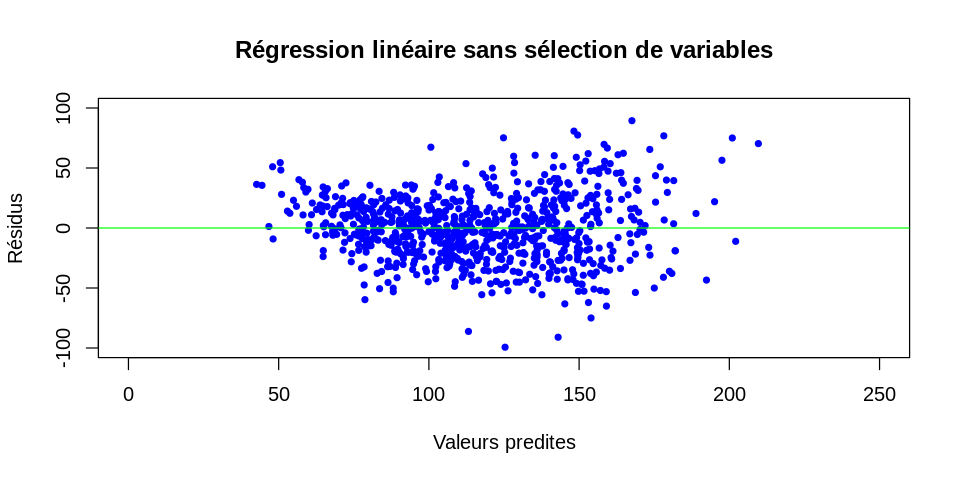

In [316]:
# estimation du modèle sans interaction
reg.lm <- aov(O3obs ~ . , data = datappr)

# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

# Graphe des résidus. 
plot.res(fit.lm,res.lm,"Régression linéaire sans sélection de variables")

#### Q1 : Que dire de la distribution de ces résidus?

La distibution de ces résidus est assymétrique à cause de la présence des valeurs atypiques

#### Q2 : La forme du nuage renseigne sur les hypothèses de linéarité du modèle et d'homoscédasticité. Que dire de la validité de ce modèle?
Comme on le voit sur la figure la variance des résidus n'est pas constante, elle est plus ou moins forte donc il n ya pas d’homoscedacité.

In [320]:
summary(reg.lm)

             Df Sum Sq Mean Sq F value   Pr(>F)    
JOUR          1     55      55   0.070 0.791587    
MOCAGE        1 527587  527587 671.935  < 2e-16 ***
TEMPE         1 222886  222886 283.868  < 2e-16 ***
STATION       4  11152    2788   3.551 0.006988 ** 
VentMOD       1  13900   13900  17.704 2.87e-05 ***
VentANG       1  10844   10844  13.811 0.000216 ***
SRMH2O        1   2911    2911   3.707 0.054525 .  
LNO2          1   2732    2732   3.480 0.062481 .  
LNO           1  12373   12373  15.758 7.83e-05 ***
Residuals   819 643059     785                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [321]:
coef(reg.lm)

(Intercept)       JOUR1      MOCAGE       TEMPE  STATIONAls  STATIONCad 
-21.3078739   2.1348715   0.4338683   4.2376281   3.1731549  10.5840172 
 STATIONPla  STATIONRam     VentMOD     VentANG      SRMH2O        LNO2 
 20.1790467   4.5627501  -1.3971154   4.3938295 121.4985176 -17.7947879 
        LNO 
 19.9552795

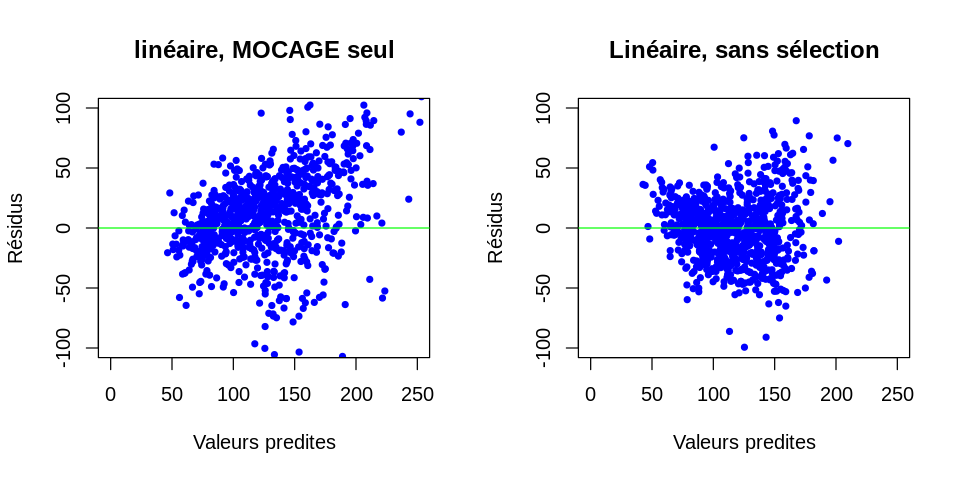

In [322]:
# Graphe des résidus du modèle déterministe MOCAGE
par(mfrow = c(1, 2))
plot.res(datappr[, "MOCAGE"],
         datappr[, "MOCAGE"] - datappr[, "O3obs"], "linéaire, MOCAGE seul")
plot.res(fit.lm, res.lm, "Linéaire, sans sélection")
par(mfrow = c(1, 1))


### Q3 : Ce premier modèle est comparé avec celui de la seule prévision déterministe MOCAGE. Qu'en conclure?
On voit bien que l'erreur est accentuée sur le graphique de gauche, ce qui permet de conclure que la variable mocage est la variable qui influence le modèle. Cette variable peut être à l'origine de la cause des erreurs apparues sur celle de droite.

In [324]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-6



,JOUR0,JOUR1,MOCAGE,TEMPE,STATIONAls,STATIONCad,STATIONPla,STATIONRam,VentMOD,VentANG,SRMH2O,LNO2,LNO
1,0,1,93.2,21.5,0,0,0,0,9.5000,-0.64350,0.09203260,0.4712528,-0.85802182
3,1,0,103.6,17.4,0,0,0,0,9.3771,-0.12832,0.09751923,0.5050087,-0.76142602
4,1,0,94.8,18.8,0,0,0,0,9.4578,-0.34516,0.09246621,0.8544153,-0.35524739
7,1,0,127.7,26.6,0,0,0,0,4.8042,0.04164,0.09679876,1.0441561,-0.59783700
8,0,1,164.3,23.5,0,0,0,0,4.8795,0.79989,0.10425929,2.7557604,1.06849666
9,0,1,144.1,23.3,0,0,0,0,5.1088,0.70226,0.10807405,2.1755469,0.62433286
10,1,0,112.8,23.7,0,0,0,0,5.4406,0.94200,0.10445095,2.9397438,1.54756251
11,1,0,72.6,22.2,0,0,0,0,5.9641,-0.60661,0.12751471,1.4487996,0.26543646
12,1,0,146.0,14.3,0,0,0,0,5.8034,-0.03447,0.12054045,2.6147646,1.09058012
13,1,0,87.5,18.5,0,0,0,0,7.5273,0.33856,0.09792855,1.4173084,0.23980399


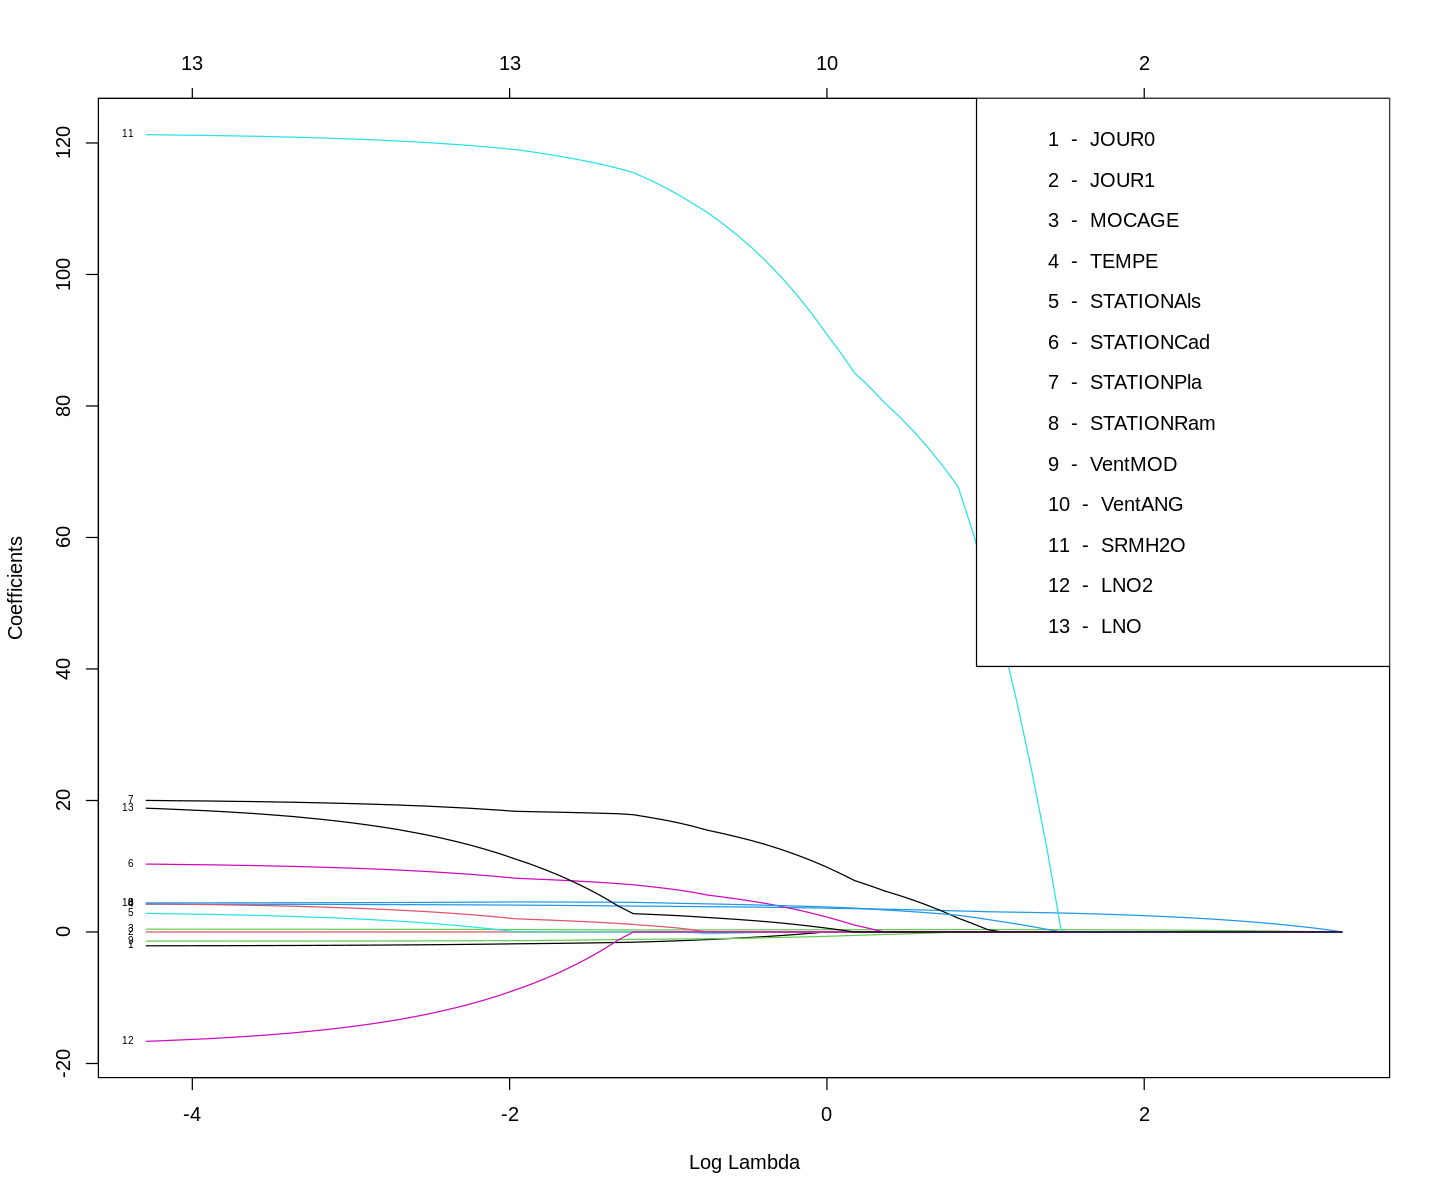

In [325]:
#install.packages("glmnet")
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 2],
                           x = as.matrix(datappr[, -c(1, 2, 5)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(O3obs ~ . - 1, data = datappr)
x.mat
reg.lasso <- glmnet(y = datappr$O3obs, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

### 3.2.2. Modèle Quadratique

#### Qb1 : Quel autre critère, équivalent à AIC dans le cas gaussien et de variance résiduelle connue, est utilisée en régression linéaire?
Deux autres critéres sont equivalents à l'AIC ce sont le Cp de Mallows ainsi que le Bayesian Information criterion BIC.

#### Qb2 : Pourquoi n'est-il pas utilisable ici?
Le BIC n'est pas utilisable ici parce qu'il a tendence à pénaliser lourdement les modèles complexes dés que le n>e^2=~7.2 avec n qui correspond au nombre d'observations.


In [249]:
# Estimation du modèle de toute interaction d'ordre 2
reg.glm=glm(O3obs~(.)^2,data=datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step=step(reg.glm,direction="backward")

Start:  AIC=7745.72
O3obs ~ (JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO)^2

                  Df Deviance    AIC
- STATION:VentANG  4   450682 7738.3
- JOUR:STATION     4   451761 7740.3
- STATION:LNO      4   452627 7741.9
- VentMOD:VentANG  1   450374 7743.7
- JOUR:TEMPE       1   450409 7743.8
- JOUR:SRMH2O      1   450464 7743.9
- JOUR:LNO         1   450467 7743.9
- MOCAGE:VentANG   1   450496 7743.9
- LNO2:LNO         1   450521 7744.0
- JOUR:VentANG     1   450667 7744.3
- VentANG:SRMH2O   1   450703 7744.3
- STATION:LNO2     4   454020 7744.4
- MOCAGE:STATION   4   454034 7744.5
- JOUR:VentMOD     1   450787 7744.5
- VentMOD:LNO2     1   450810 7744.5
- JOUR:LNO2        1   450849 7744.6
- VentMOD:LNO      1   450901 7744.7
- MOCAGE:LNO       1   450923 7744.7
- TEMPE:VentMOD    1   450933 7744.8
- MOCAGE:TEMPE     1   450961 7744.8
- JOUR:MOCAGE      1   451066 7745.0
- TEMPE:VentANG    1   451123 7745.1
- VentANG:LNO2     1   451144 7745.1


In [250]:
# Coefficients du modèle
anova(reg.glm.step,test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
NULL,NA,NA,831,1447499.0,NA,NA
JOUR,1,54.86331,830,1447444.1,0.09359859,7.597321e-01
MOCAGE,1,527587.26707,829,919856.8,900.08104923,1.895937e-132
TEMPE,1,222886.22023,828,696970.6,380.25114609,2.153433e-69
STATION,4,11151.66321,824,685818.9,4.75627510,8.515852e-04
VentMOD,1,13900.38750,823,671918.6,23.71451349,1.350830e-06
VentANG,1,10843.87319,822,661074.7,18.50000061,1.912685e-05
SRMH2O,1,2910.79152,821,658163.9,4.96590507,2.613355e-02
LNO2,1,2732.22847,820,655431.7,4.66127070,3.115193e-02


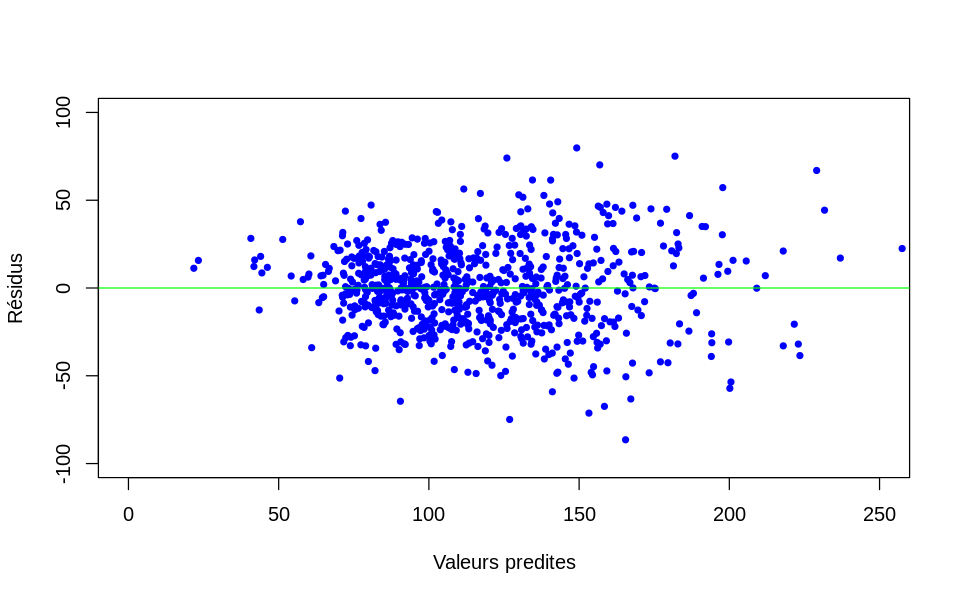

In [251]:
# Extraction des valeurs ajustées et des résidus
fit.glm=reg.glm.step$fitted.values
res.glm=reg.glm.step$residuals
# Graphe des résidus
plot.res(fit.glm,res.glm,"")

#### Prévision de l'echantillon de test

In [252]:
# Calcul des prévisions
pred.glm=predict(reg.glm.step,newdata=datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 694.6729

In [253]:
# Erreur quadratique par MOCAGE
sum((datestr[,"MOCAGE"]-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 1630.668

In [254]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.glm>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   171   11
  TRUE      9   18

In [255]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil par MOCAGE
table(datestr[,"MOCAGE"]>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   142   10
  TRUE     38   19

## 3.3. Prévision par Modèle Binomial

### 3.3.3. Régression logistique sans interaction

In [256]:
# estimation du modèle complet
log.lm=glm(DepSeuil~.,data=datappq,family=binomial)
# significativité des paramètres
anova(log.lm,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,782.0892,NA
JOUR,1,0.35616876,830,781.7330,5.506417e-01
MOCAGE,1,139.67298777,829,642.0600,3.138516e-32
TEMPE,1,150.85977532,828,491.2003,1.124700e-34
STATION,4,20.53614193,824,470.6641,3.912758e-04
VentMOD,1,12.98016289,823,457.6840,3.148086e-04
VentANG,1,0.02025727,822,457.6637,8.868209e-01
SRMH2O,1,13.01397439,821,444.6497,3.091751e-04
LNO2,1,0.04163329,820,444.6081,8.383204e-01


In [257]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step=step(log.lm,direction="backward")

Start:  AIC=467.4
DepSeuil ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + VentANG + 
    SRMH2O + LNO2 + LNO

          Df Deviance    AIC
- VentANG  1   441.44 465.44
- MOCAGE   1   442.89 466.89
- JOUR     1   443.04 467.04
<none>         441.40 467.40
- LNO2     1   444.54 468.54
- LNO      1   444.61 468.61
- VentMOD  1   448.53 472.53
- SRMH2O   1   454.87 478.87
- STATION  4   462.88 480.88
- TEMPE    1   571.49 595.49

Step:  AIC=465.44
DepSeuil ~ JOUR + MOCAGE + TEMPE + STATION + VentMOD + SRMH2O + 
    LNO2 + LNO

          Df Deviance    AIC
- MOCAGE   1   442.90 464.90
- JOUR     1   443.04 465.04
<none>         441.44 465.44
- LNO2     1   444.63 466.63
- LNO      1   444.75 466.75
- VentMOD  1   448.74 470.74
- SRMH2O   1   454.87 476.87
- STATION  4   462.97 478.97
- TEMPE    1   572.38 594.38

Step:  AIC=464.9
DepSeuil ~ JOUR + TEMPE + STATION + VentMOD + SRMH2O + LNO2 + 
    LNO

          Df Deviance    AIC
- JOUR     1   444.23 464.23
<none>         442.90 464.90
- Ven

In [258]:
# Modèle obtenu
anova(log.lm.step,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,782.0892,NA
TEMPE,1,230.618339,830,551.4709,4.370126e-52
STATION,4,43.567526,826,507.9033,7.889645e-09
VentMOD,1,32.708496,825,475.1948,1.070682e-08
SRMH2O,1,15.483300,824,459.7115,8.323744e-05
LNO2,1,3.958904,823,455.7526,4.662405e-02
LNO,1,11.523825,822,444.2288,6.870987e-04


In [259]:
# matrice de confusion de l'échantillon 
# d'apprentissage et erreur apparente
table(log.lm.step$fitted.values>0.5,
   datappq[,"DepSeuil"])

       
        FALSE TRUE
  FALSE   653   69
  TRUE     30   80

### 3.3.3. Régression logistique avec interaction

In [260]:
# régression avec le modèle minimum
log.qm=glm(DepSeuil~1,data=datappq,family=binomial)
# algorithme stepwise en précisant le plus grand 
# modèle possible
log.qm.step1=step(log.qm,direction="both",
  scope=list(lower=~1,upper=~(JOUR + MOCAGE + 
  TEMPE + STATION + VentMOD + VentANG + LNO2 + 
  LNO + SRMH2O)^2), family=binomial)

Start:  AIC=784.09
DepSeuil ~ 1

          Df Deviance    AIC
+ TEMPE    1   551.47 555.47
+ MOCAGE   1   643.70 647.70
+ SRMH2O   1   704.81 708.81
+ STATION  4   767.72 777.72
+ VentANG  1   775.54 779.54
+ LNO2     1   775.92 779.92
+ VentMOD  1   777.12 781.12
+ LNO      1   777.83 781.83
<none>         782.09 784.09
+ JOUR     1   781.73 785.73

Step:  AIC=555.47
DepSeuil ~ TEMPE

          Df Deviance    AIC
+ MOCAGE   1   493.02 499.02
+ STATION  4   507.90 519.90
+ SRMH2O   1   515.29 521.29
+ VentMOD  1   540.30 546.30
+ VentANG  1   546.73 552.73
+ LNO      1   547.71 553.71
<none>         551.47 555.47
+ JOUR     1   550.74 556.74
+ LNO2     1   551.41 557.41
- TEMPE    1   782.09 784.09

Step:  AIC=499.02
DepSeuil ~ TEMPE + MOCAGE

               Df Deviance    AIC
+ SRMH2O        1   472.75 480.75
+ STATION       4   472.90 486.90
+ LNO           1   484.28 492.28
+ LNO2          1   484.98 492.98
+ VentMOD       1   489.37 497.37
<none>              493.02 499.02
+ JOUR  

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                  Df Deviance    AIC
+ TEMPE:LNO        1   368.36 428.36
- TEMPE:STATION    4   383.18 433.18
<none>                 376.12 434.12
+ LNO:SRMH2O       1   374.85 434.85
+ MOCAGE:LNO       1   375.08 435.08
+ VentANG          1   375.42 435.42
+ LNO2             1   375.60 435.60
+ TEMPE:VentMOD    1   375.82 435.82
+ MOCAGE:SRMH2O    1   375.94 435.94
+ JOUR             1   375.94 435.94
+ VentMOD:LNO      1   376.03 436.03
+ VentMOD:SRMH2O   1   376.12 436.12
- TEMPE:MOCAGE     1   380.18 436.18
- MOCAGE:STATION   4   388.92 438.92
+ STATION:VentMOD  4   373.01 439.01
- STATION:LNO      4   390.22 440.22
- SRMH2O:STATION   4   392.29 442.29
- MOCAGE:VentMOD   1   388.31 444.31
- TEMPE:SRMH2O     1   388.45 444.45


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=428.36
DepSeuil ~ TEMPE + MOCAGE + SRMH2O + STATION + VentMOD + LNO + 
    TEMPE:SRMH2O + TEMPE:STATION + SRMH2O:STATION + MOCAGE:VentMOD + 
    MOCAGE:STATION + TEMPE:MOCAGE + STATION:LNO + TEMPE:LNO



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                  Df Deviance    AIC
<none>                 368.36 428.36
+ MOCAGE:LNO       1   367.21 429.21
+ TEMPE:VentMOD    1   367.78 429.78
+ VentANG          1   368.03 430.03
+ LNO2             1   368.09 430.09
+ MOCAGE:SRMH2O    1   368.10 430.10
+ JOUR             1   368.16 430.16
+ VentMOD:LNO      1   368.24 430.24
+ LNO:SRMH2O       1   368.35 430.35
+ VentMOD:SRMH2O   1   368.36 430.36
- TEMPE:MOCAGE     1   373.36 431.36
- TEMPE:STATION    4   380.25 432.25
+ STATION:VentMOD  4   364.50 432.50
- TEMPE:LNO        1   376.12 434.12
- MOCAGE:STATION   4   382.87 434.87
- MOCAGE:VentMOD   1   378.75 436.75
- STATION:LNO      4   385.47 437.47
- SRMH2O:STATION   4   386.47 438.47
- TEMPE:SRMH2O     1   382.36 440.36


In [261]:
anova(log.qm.step1,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,831,782.0892,NA
TEMPE,1,230.6183386,830,551.4709,4.370126e-52
MOCAGE,1,58.4534801,829,493.0174,2.081551e-14
SRMH2O,1,20.2719123,828,472.7455,6.717961e-06
STATION,4,18.4976219,824,454.2479,9.862021e-04
VentMOD,1,7.6792812,823,446.5686,5.585841e-03
LNO,1,0.1323657,822,446.4362,7.159917e-01
TEMPE:SRMH2O,1,5.2086349,821,441.2276,2.247497e-02
TEMPE:STATION,4,10.1883028,817,431.0393,3.737244e-02


In [262]:
# Prévision
pred.log=predict(log.qm.step1,newdata=datestq,type="response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
table(pred.log>0.5,datestq[,"DepSeuil"])

       
        FALSE TRUE
  FALSE   173   12
  TRUE      7   17

#### Q1: Comparer avec l'approche précédente. Mémoriser les résultats obtenus pour comparer avec les autres méthodes.

Les résultats sont comparables avec un nombre de bonnes classification BC = 190  et un nombre de mal classés MalC=19 observations dans le modèle logistique qui sont comparés à BC=189 et MalC=20 dans la regression linéaire, on conlut donc que la regression logistique est plus precise

#### Courbe de ROC

In [263]:
install.packages ("ROCR", dep = T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [264]:
library(ROCR)   # Librairie à charger

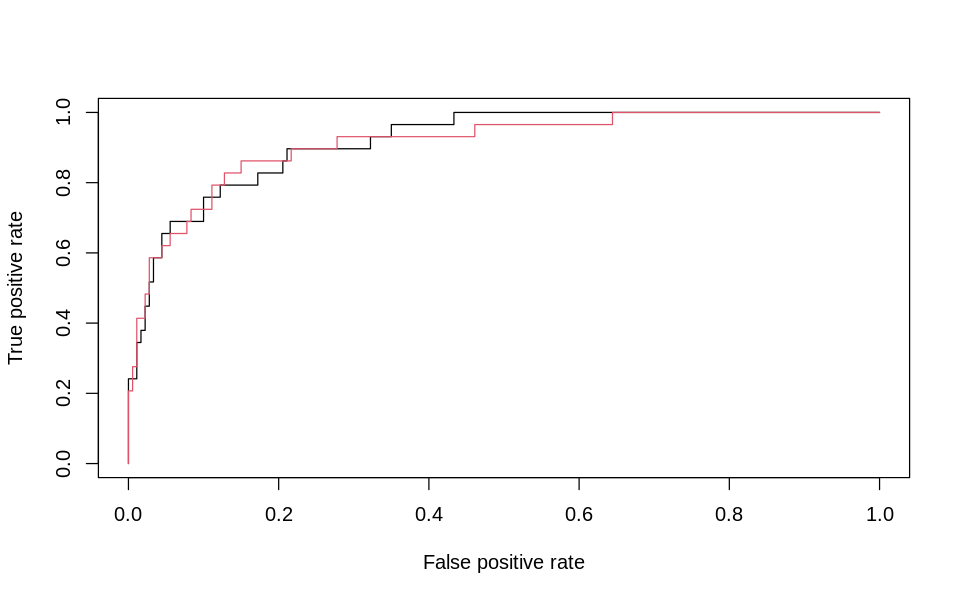

In [265]:
roclogit=predict(log.qm.step1,newdata=datestq,type="response")
predlogit=prediction(roclogit,datestq[,"DepSeuil"])
perflogit=performance(predlogit, "tpr","fpr")
# Tracé de la courbe
plot(perflogit,col=1)
# Calculs pour la régression
rocglm=pred.glm/300
predglm=prediction(rocglm,datestq[,"DepSeuil"])
perfglm=performance(predglm, "tpr","fpr")
# tracé de la courbe et ajout au graphe précédent.
plot(perfglm,col=2,add=TRUE)

#### Q2 Que sont sensibilité et spécificité d'une courbe ROC?

Dans la courbe de ROC :
- La sensibilité représente la probabilité de detecter un vrai signal
- La spécificité, elle, représente la probabilité de detecter un signal à tort

#### Q3 : Les performances des deux approches gaussiennes et binomiales sont-elles très différentes?

Les résultats des deux approches sont presque similaire avec une seule observation de difference, donc ces deux modèles ne sont pas très differents


## 3.4. Analyse discriminante

#### Q4.1 : Quel critère d'affectation est utilisé en lda?

En LDA le critère d'affectation est un critère linéaire en la variable x

#### Q4.2 : Que signifient les hypothèses d'homo ou d'hétéroscédasticité?

L'homoscédasticité s'observe lorsque la dispersion des résidus est homogène sur tout le spectre des valeurs endogénes ou exogènes. L'hypothèse de l'homoscedasticité requiert que la variance des residus soit la méme pour chauqe observation.
Tandis que l'heteroscedasticité indique que la variance des résidus n'est pas constante.

#### Q4.3 : Quelle fonction est estimée "non paramétriquement" par l'algorithme des $k$ plus proches voisins?

La fonction estimée, non paramétriquement, par l'algorithme des k plus proches voisins est le fonction de densité de probabilité h(x). (Cette derniere requiert la regularité de h pour de bonnes propriétés de convergence)

### 3.4.1. Estimation du modèle

In [266]:
library(MASS) # chargement des librairies
library(class) # pour kNN

In [267]:
# analyse discriminante linéaire
disc.lda=lda(DepSeuil~.,data=datappq[,-4]) 
# analyse discriminante quadratique 
disc.qda=qda(DepSeuil~.,data=datappq[,-4]) 
# k plus proches voisins
disc.knn=knn(datappq[,c(-4,-10)],datappq[,c(-4,-10)],datappq$DepSeuil,k=10)

### 3.4.2. Estimation de l'erreur de prévision par validation croisée

In [268]:
# erreur par validation croisée  en analyse discriminante linéaire
disc.lda=lda(DepSeuil~.,data=datappq[,-4],CV=T) 
# estimer le taux d'erreur à partir de la matrice de confusion
table(datappq[,"DepSeuil"],disc.lda$class)

       
        FALSE TRUE
  FALSE   655   28
  TRUE     75   74

In [269]:
# analyse discriminante quadratique
disc.qda=qda(DepSeuil~.,data=datappq[,-4],CV=T)  
table(datappq[,"DepSeuil"],disc.qda$class)

       
        FALSE TRUE
  FALSE   643   40
  TRUE     85   64

In [270]:
install.packages('e1071', dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



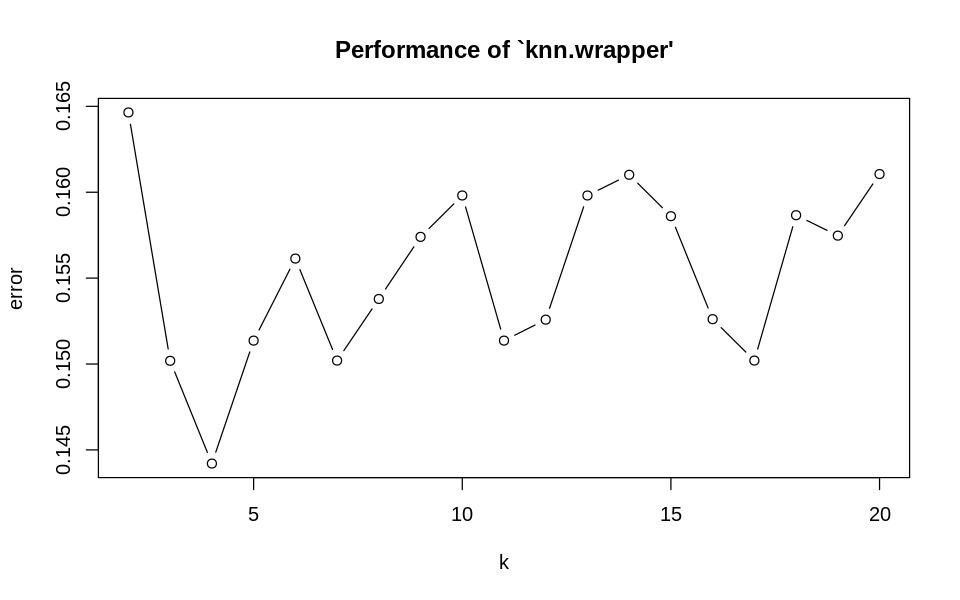

In [271]:
# k plus proches voisins: optimisation de k
library(e1071)
plot(tune.knn(as.matrix(datappq[,c(-4,-10)]),as.factor(datappq[,10]),k=2:20))

#### Q1 : Quelle procédure de validation croisée est exécutée par défaut par la fonction tune?
La procédure de validation croisée utilisé par la fonction tune est la "Mfold" 

#### Q2 : Pourquoi la valeur de $k$ optimale diffère à chaque exécution? Comment choisir k ?

Car les résultats dépendront fortement des répartitions aléatoires et de la taille de l'échantillon?????a revoir

#### Comparer avec les erreurs précédentes estimées également par validation croisée.
On remarque que l'analyse linéaire discriminante fournit de meilleurs resultats que l'analyse quadratique discriminante à travers les resultats de la matrice de confusion. Il y a plus de valeurs predites correctement et donc moins d'erreur dans le LDA que dans le QDA. En ce qui concerne les k plus proches voisins, le résultat est très variables autour d'une erreur=0.15 comme ce n'est pas les memes mesure de performance on ne peut pas comparer le KNN au LDA et QDA

#### Q3 : Quelle analyse discriminante retenir ? Pourquoi?
L'analyse linéaire discriminante est la meilleure méthode car elle a fournit les meilleures resultats.

### Erreur sur l'échantillon test

In [272]:
disc.lda=lda(DepSeuil~.,data=datappq[,-4])  
table(datestq[,"DepSeuil"],predict(disc.lda,datestq[,-4])$class)

       
        FALSE TRUE
  FALSE   170   10
  TRUE     14   15

In [273]:
disc.knn=knn(as.matrix(datappq[,c(-4,-10)]),as.matrix(datestq[,c(-4,-10)]),datappq$DepSeuil,k=15)
table(disc.knn,datestq$DepSeuil)

        
disc.knn FALSE TRUE
   FALSE   168   15
   TRUE     12   14

#### Courbe de ROC

#### Qa3 : Ce premier modèle est comparé avec celui de la seule prévision déterministe MOCAGE. Qu'en conclure?

??????????

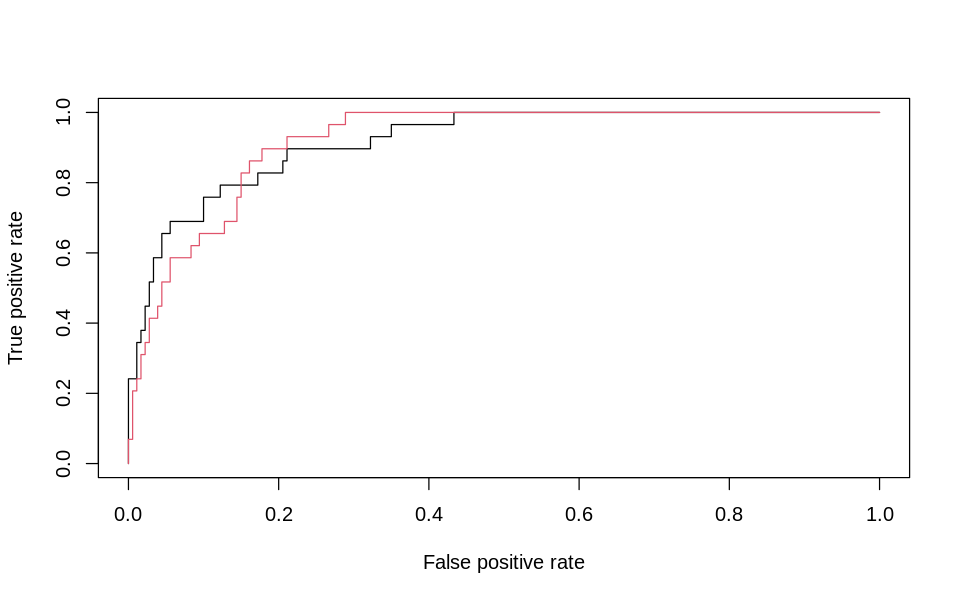

In [274]:
ROCdiscrim=predict(disc.lda,datestq[,c(-4)])$posterior[,2]
preddiscrim=prediction(ROCdiscrim,datestq$DepSeuil)
perfdiscrim=performance(preddiscrim,"tpr","fpr")
# tracer les courbes ROC en les superposant pour mieux comparer
plot(perflogit,col=1) 
plot(perfdiscrim,col=2,add=TRUE)

#### Q Une méthode est elle uniformément meilleure sur cet échantillon test ?
Non il n'ya pas une methode uniformément meilleure que l'autre. Au départ la coubre noire prend le dessus mais au bout d'un moment la courbe rouge la rattrappe et la dépasse. Au final, c'est cette dernière qui fournit les meilleures performances. 

## 3.5. Arbre de décision binaire

### 3.5.1. Estimation et élagage de l'arbre de régression

#### Q1. Quel critère est optimisé lors de la création d'un noeud? de l'arbre?
Le critère optimisé dans l'arbre de decision est le critère de division qui repose sur une fonction d'homogeneité

In [275]:
library(rpart) # chargement de la librairie
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=0.001))
# La commande ci-dessous fournit un descriptif de l'arbre obtenu
# summary(tree.reg)  
# mais un graphe est  préférable

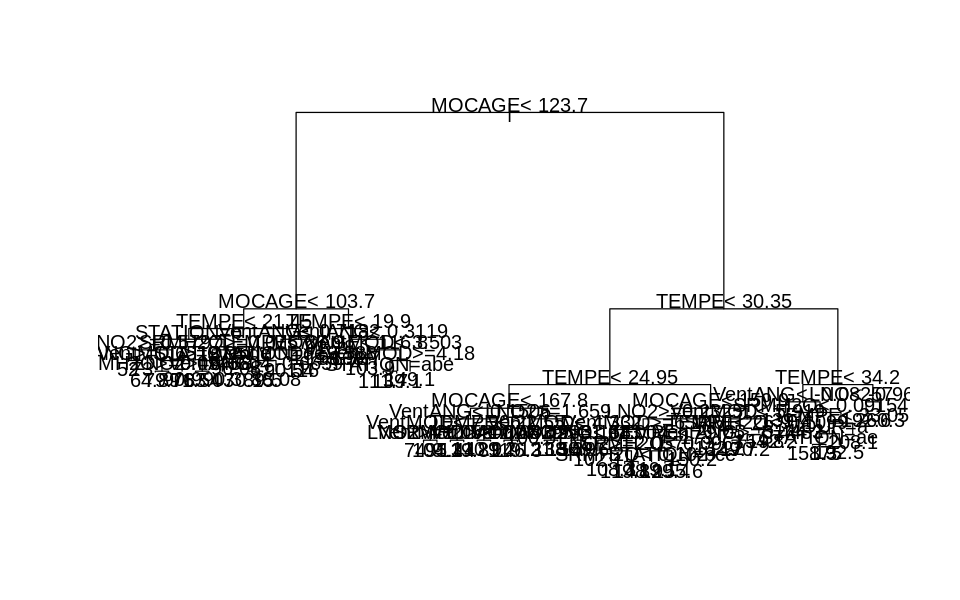

In [276]:
plot(tree.reg)
text(tree.reg)

In [277]:
xmat=xpred.rpart(tree.reg)
xerr=(xmat-datappr[,"O3obs"])^2
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur

0.664163827 0.203910431 0.070710931 0.036082643 0.030817765 0.022371828 
  1451895.1    989892.0    820598.3    783780.5    720129.6    707988.5 
0.015672361 0.012649048 0.010339586 0.008489925 0.007408990 0.007180079 
   693494.7    671547.1    654305.3    662788.2    666963.6    667435.9 
0.006690878 0.006025392 0.005674881 0.005408910 0.005039850 0.004544168 
   672252.8    674514.6    678741.3    682626.7    684046.7    688009.2 
0.004266808 0.004192568 0.004080841 0.003814980 0.003614965 0.003591050 
   700703.4    704381.1    706126.5    711580.4    713006.2    713006.2 
0.003452842 0.003278010 0.003103833 0.002864732 0.002724863 0.002699778 
   713901.2    721125.5    721381.6    727039.2    733604.0    734064.9 
0.002617881 0.002525856 0.002383048 0.002147986 0.002024193 0.001952617 
   738168.8    739116.2    739561.5    736383.5    742047.3    740352.3 
0.001778209 0.001598335 0.001529554 0.001506121 0.001472239 0.001422222 
   740262.1    751310.5    749411.0    751987.8    750699.5    756540.9 
0.001361176 0.001328760 0.001301682 0.001245546 0.001162209 0.001083348 
   755134.5    751828.3    751237.0    753532.0    755152.7    755588.3 
0.001036671 0.001011240 
   756795.3    756482.6

In [278]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.01033959

In [279]:
tree.reg=rpart(O3obs~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

In [280]:
install.packages('partykit', dependencies = TRUE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



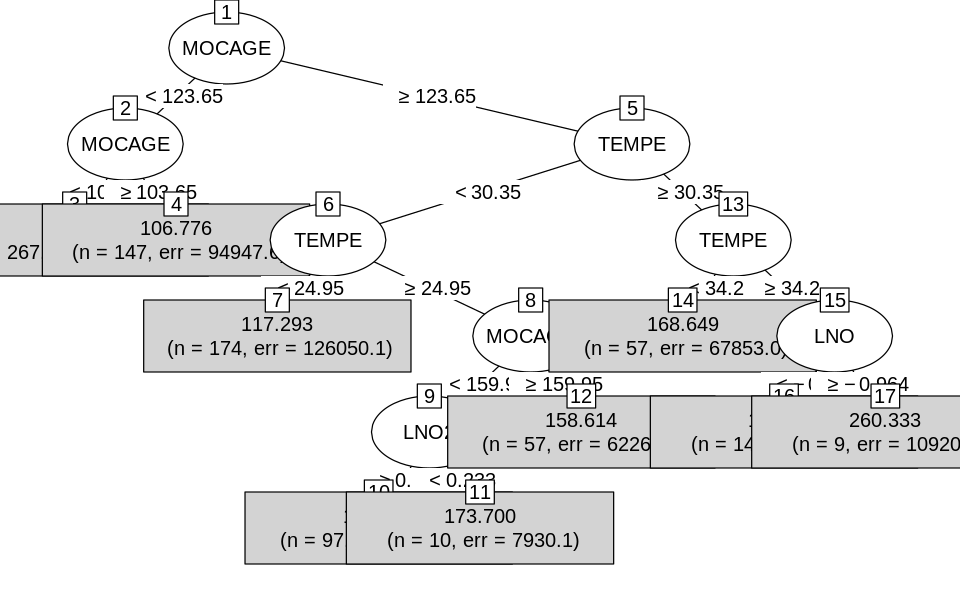

In [281]:
library(partykit)
plot(as.party(tree.reg), type="simple")

#### Q Quelle est la variable qui contribue le plus à l'interprétation?
????????,

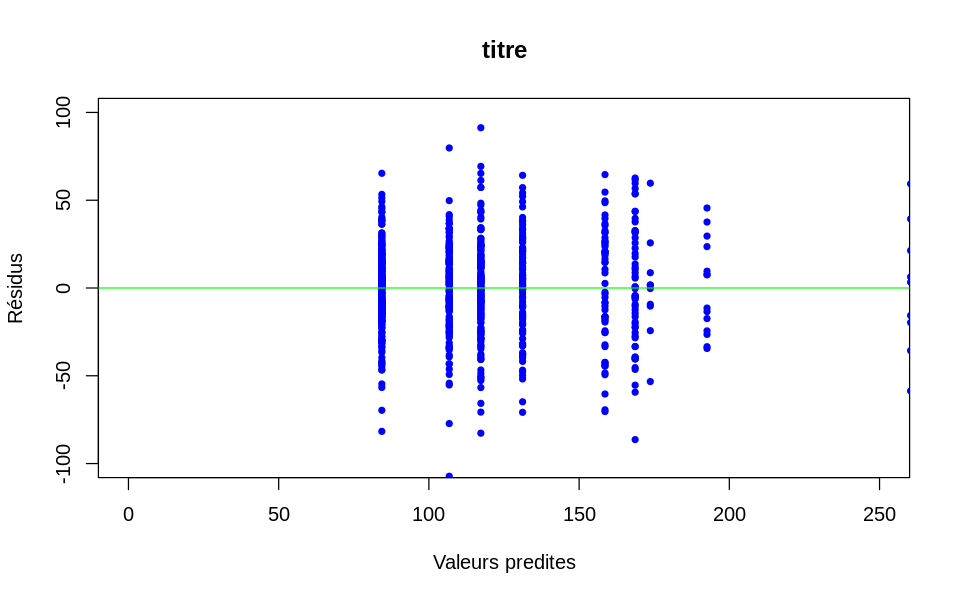

In [282]:

fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"O3obs"]
plot.res(fit.tree,res.tree)

#### Q A quoi est due la structure particulière de ce graphe?

### 3.5.2. Estimation et élagage d'un arbre de discrimination


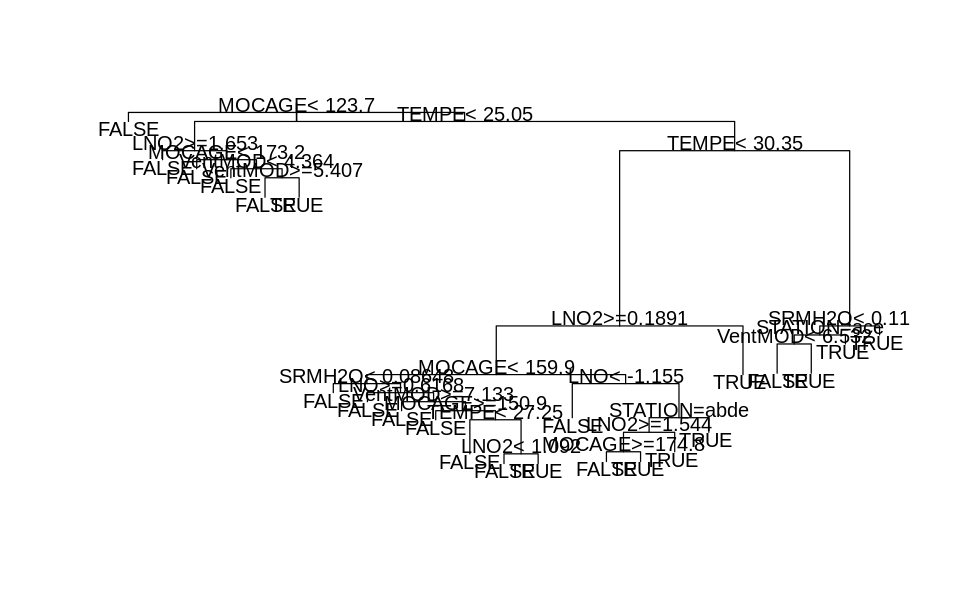

In [283]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),cp=0.001)
plot(tree.dis) 
text(tree.dis)


#### Q. Quel autre critère d'hétérogénéité est utilisé?
Il est possible d'utiliser le critère d'entropie.

In [284]:

xmat = xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr=datappq$DepSeuil!= (xmat>1.5) 
# Calcul  des estimations des taux d'erreur
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr

0.546979866 0.079410467 0.039705233 0.019179450 0.014498301 0.011230336 
  0.1790865   0.1478365   0.1454327   0.1490385   0.1490385   0.1478365 
0.007941047 0.002590639 
  0.1478365   0.1526442

In [285]:
as.numeric(attributes(which.min(CVerr))$names)

[1] 0.03970523

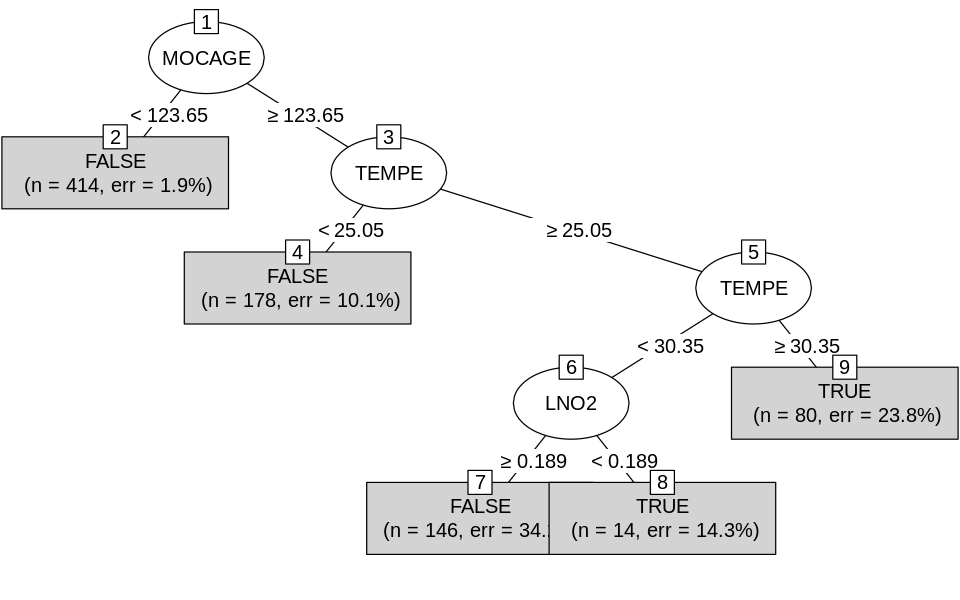

In [286]:
tree.dis=rpart(DepSeuil~.,data=datappq,parms=list(split="information"),
               cp=as.numeric(attributes(which.min(CVerr))$names))
plot(as.party(tree.dis), type="simple")

### Prévision de l'echantillon de test

In [287]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
pred.treeq=predict(tree.dis,newdata=datestq,type="class") 
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"O3obs"])^2)/nrow(datestr)

[1] 952.7401

In [288]:
# Matrice de confusion pour la prévision du 
# dépassement de seuil (régression)
table(pred.treer>150,datestr[,"O3obs"]>150)

       
        FALSE TRUE
  FALSE   159    9
  TRUE     21   20

In [289]:
# Même chose pour l'arbre de discrimination
table(pred.treeq,datestq[,"DepSeuil"])

          
pred.treeq FALSE TRUE
     FALSE   168   14
     TRUE     12   15

#### Q. Quelle stratégie semble meilleure à ce niveau?

Il semblerai que la methode de discrimination soir meilleure car son taux de bonnes classification est plus elevé que celui de la regression.

#### Courbe de ROC

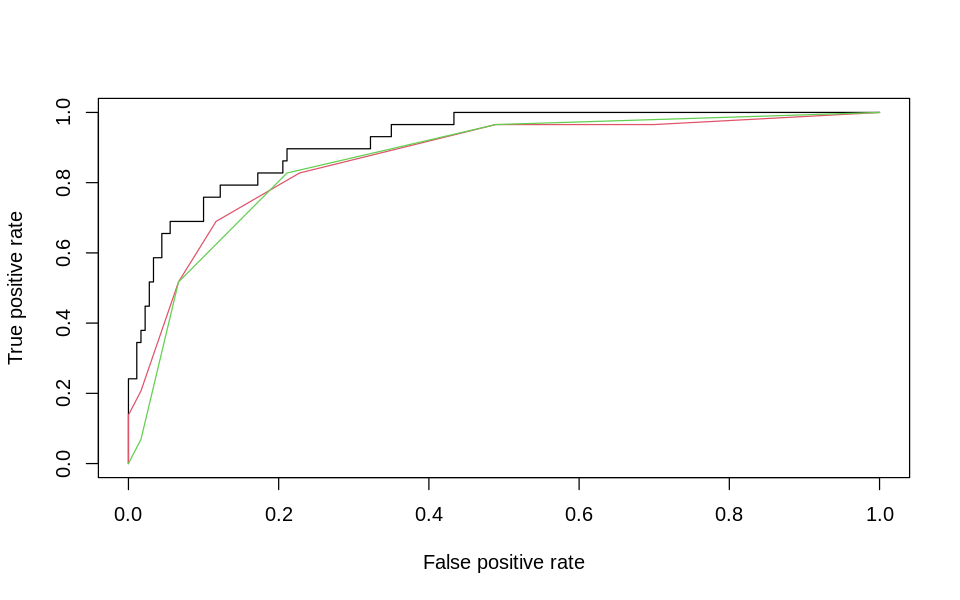

In [290]:
ROCregtree=pred.treer/300
predregtree=prediction(ROCregtree,datestq$DepSeuil)
perfregtree=performance(predregtree,"tpr","fpr")
ROCdistree=predict(tree.dis,newdata=datestq,type="prob")[,2]
preddistree=prediction(ROCdistree,datestq$DepSeuil)
perfdistree=performance(preddistree,"tpr","fpr")
# tracer les courbes ROC en les superposant 
# pour mieux comparer
plot(perflogit,col=1)
plot(perfregtree,col=2,add=TRUE) 
plot(perfdistree,col=3,add=TRUE)

#### Q. Une meilleure méthode se dégage-t-elle?

Oui la courbe noir correspond à la meilleure prédiction 

## 3.6. Réseau de neurones

#### Q. Quelle fonction de transfert pour le dernier neurone en régression ?
La fonction de transfert du dernier neurone pour une regression est une fonction identité appelée ReLU

#### Q. Quelle fonction de transfert pour le dernier neurone en discrimination binaire?
La fonction de transfert du dernier neurone pour une classification binaire est une fonction sigmoide

#### Q. Qui de la discrimination avec plusieurs classes?
Dans le cas de la dscimination avec plusieurs classes, il convient d'utiliser une fonction softmax,à valeurs dans R^m. Ces m valeurs sont assimilables à des probabilités d’appartenance à une classe, tel que la somme de ces probabilités est égale à 1.

#### Q. Quel est le choix par défaut pour les neurones de la couche cachée?
Le choix par defaut de la fonction de transfert des neurones de la couche cachée est une fonction sigmoide

#### Q. Quel est le paramètre decay de la fonction nnet?
Le paramètre decay de la fonction nnet est un parametre de regularisation qui permet d'optimiser le nombre de neurones
#### Q. Indiquer une autre façon déviter le sur-apprentissage.
La deuxiéme solution permettant d'eviter le sur-apprentissage est la methode 

In [291]:
library(MASS)
library(nnet)
# apprentissage
# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(O3obs~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  71
initial  value 12733920.474131 
iter  10 value 1662730.205502
iter  20 value 1561719.839873
iter  30 value 1367802.032525
iter  40 value 1167356.913178
iter  50 value 965697.610299
iter  60 value 877402.712076
iter  70 value 816469.896201
iter  80 value 766461.834136
iter  90 value 758698.324384
iter 100 value 733110.433159
iter 110 value 713554.268156
iter 120 value 691944.407454
iter 130 value 661931.041263
iter 140 value 637508.262756
iter 150 value 626520.693727
iter 160 value 615266.225437
iter 170 value 608075.902654
iter 180 value 594658.877184
iter 190 value 571463.260184
iter 200 value 554418.954050
iter 210 value 543334.315861
iter 220 value 521491.248497
iter 230 value 507233.273917
iter 240 value 501849.899872
iter 250 value 493601.305381
iter 260 value 482036.691479
iter 270 value 470172.206233
iter 280 value 450006.927277
iter 290 value 443567.277422
iter 300 value 438084.477439
iter 310 value 436031.734029
iter 320 value 434487.912350
iter 330 value 433460

a 12-5-1 network with 71 weights
options were - linear output units  decay=1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   1.07   -1.93   -0.04    2.66  -25.89   21.97   11.66    3.65   -3.84   10.73 
i10->h1 i11->h1 i12->h1 
  -1.06  -28.43   10.72 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   2.06   -0.15    0.04   -0.06   -0.87   -1.45    1.92   -2.09   -0.11    0.04 
i10->h2 i11->h2 i12->h2 
 -45.24    1.12   -0.07 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -2.76   -5.07   -0.03    1.17  -14.12    3.06   -7.06    1.89    3.08   -2.47 
i10->h3 i11->h3 i12->h3 
 -24.50  -12.19   12.64 
  b->h4  i1->h4  i2->h4  i3->h4  i4->h4  i5->h4  i6->h4  i7->h4  i8->h4  i9->h4 
 -30.18   -0.10   -0.05    0.52    2.08    1.22    3.88    0.83    0.28    0.58 
i10->h4 i11->h4 i12->h4 
  38.92    6.66   -5.48 
  b->h5  i1->h5  i2->h5  i3->h5  i4->h5  i5->h5  i6->h5  i7->h5  i8->h5  i9

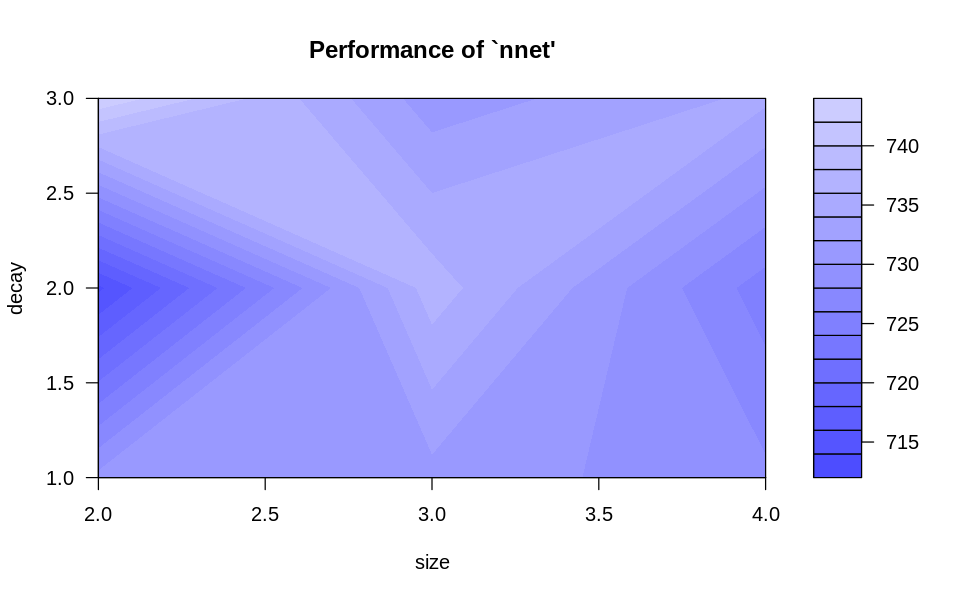

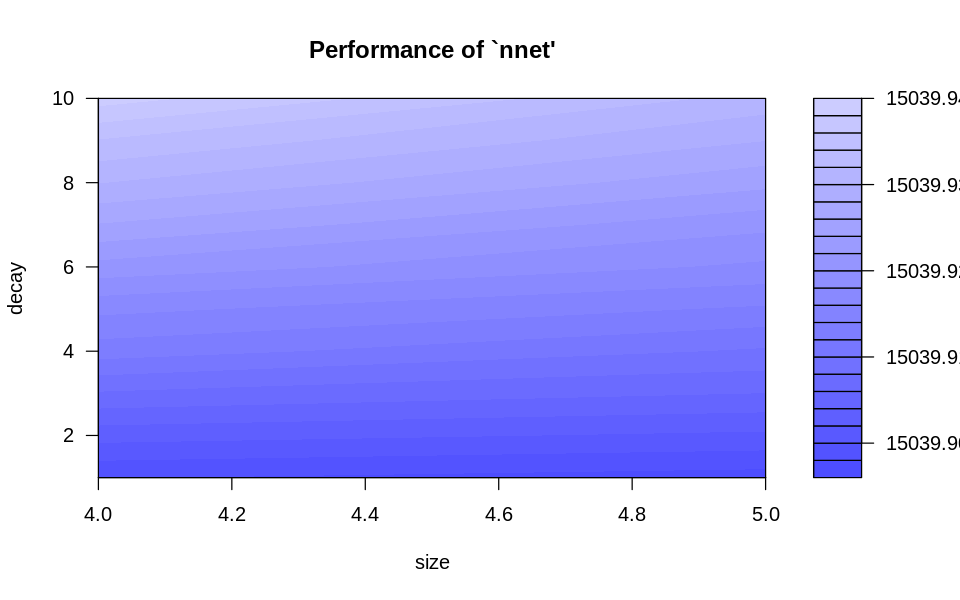

In [292]:
library(e1071)
plot(tune.nnet(O3obs~.,data=datappr,size=c(2,3,4),decay=c(1,2,3),maxit=200,linout=TRUE))
plot(tune.nnet(O3obs~.,data=datappr,size=4:5,decay=1:10))